#Install note2vec and networkx

In [1]:
pip install networkx node2vec


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.8 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.1
    Uninstalling networkx-3.1:
      Successfully uninstalled networkx-3.1


#Mount Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Training and preperation step
500 iterations with a counter to each edge, used to determine the amount of successfully reconstructed edges.
Preparation stage, create the graph using the dataset and select number of iterations for the training step.

In [ ]:
import random
import networkx as nx
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from node2vec import Node2Vec
from operator import itemgetter
import csv


# Load the CORA dataset and create the graph
edgelist_file = '/content/drive/MyDrive/Colab Notebooks/cora.cites'
g = nx.read_edgelist(edgelist_file, nodetype=int)

# Print the number of nodes and edges before removal
num_nodes_before = g.number_of_nodes()
num_edges_before = g.number_of_edges()
print("Number of nodes before removal:", num_nodes_before)
print("Number of edges before removal:", num_edges_before)


# Define the fraction of edges to remove and the random seed
frac_edges_to_remove = 0.3
random_seed = 42
num_iterations = 500

# Get the list of edges to remove
num_edges_to_remove = int(frac_edges_to_remove * g.number_of_edges())
# Initialize a dictionary to count the number of times each edge has been successfully reconstructed
reconstruction_counts = {edge: 0 for edge in g.edges()}



Number of nodes before removal: 2708
Number of edges before removal: 5278
Graph saved successfully as /content/drive/MyDrive/Colab Notebooks/cora_graph.graphml


Create graph for visual representation in Gephi

In [ ]:
# Save the graph as a GraphML file
output_file = "/content/drive/MyDrive/Colab Notebooks/cora_graph.gexf"
nx.write_gexf(g, output_file)
print("Graph saved successfully as", output_file)

Train the model with a set of iterations determined in the prep step

In [ ]:
for iteration in range(num_iterations):
    print("Iteration:", iteration , "\n")
    # Get the list of edges to remove
    num_edges_to_remove = int(frac_edges_to_remove * g.number_of_edges())
    random.seed(iteration)  # Set the random seed based on the iteration
    edges_to_remove = random.sample(g.edges(), num_edges_to_remove)

    # Create a new graph with the removed edges
    g_removed = g.copy()
    g_removed.remove_edges_from(edges_to_remove)

    # Train the node2vec model on the graph with removed edges
    node2vec = Node2Vec(g_removed, dimensions=64, walk_length=30, num_walks=200, workers=4)
    model = node2vec.fit(window=2, min_count=1)

    # Predict the removed edges
    for edge in edges_to_remove:
        try:
            # Get the node embeddings for the source and target nodes of the edge
            src_emb = model.wv[str(edge[0])]
            tgt_emb = model.wv[str(edge[1])]

            # Use cosine similarity to predict whether the edge should exist or not
            score = np.dot(src_emb, tgt_emb) / (np.linalg.norm(src_emb) * np.linalg.norm(tgt_emb))
            #print("Edge:   ",edge)
            #print("Score:   ",score)

            # If the score is above a threshold, consider the edge successfully reconstructed
            if score > 0.6:
                if edge in reconstruction_counts:
                    reconstruction_counts[edge] += 1
                else:
                    reconstruction_counts[edge] = 1
        except KeyError:
            # If one of the nodes is not in the vocabulary, skip this edge
            pass

# Print the number of times each edge has been successfully reconstructed
print("Reconstruction Counts:")
edges_count=0
for edge, count in reconstruction_counts.items():
      print(f"Edge: {edge}  Count: {count}")
      edges_count+=1

#Print number of edges successfully reconstructed
print("Number of edges successfully reconstructed:", edges_count)

# Print the number of nodes and edges after removal
num_nodes_after = g.number_of_nodes()
num_edges_after = g.number_of_edges() - num_edges_to_remove
print("Number of nodes after removal:", num_nodes_after)
print("Number of edges after removal:", num_edges_after)


file_path = '/content/drive/MyDrive/Colab Notebooks/reconstruction_counts.csv'

with open(file_path, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['Edge', 'Count'])  # Write the header row

    for key, value in reconstruction_counts.items():
        writer.writerow([key, value])  # Write each row

Iteration: 0 



<ipython-input-19-82ae5b006611>:6: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  edges_to_remove = random.sample(g.edges(), num_edges_to_remove)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
Edge: (1153943, 97390)  Count: 0
Edge: (1153943, 576257)  Count: 0
Edge: (1154176, 33895)  Count: 0
Edge: (1154459, 14062)  Count: 0
Edge: (1154459, 82920)  Count: 0
Edge: (1154459, 85352)  Count: 1
Edge: (116552, 40)  Count: 0
Edge: (116552, 116553)  Count: 0
Edge: (116552, 246618)  Count: 0
Edge: (12576, 887)  Count: 0
Edge: (12576, 6213)  Count: 0
Edge: (12576, 1071981)  Count: 0
Edge: (12576, 1104999)  Count: 1
Edge: (12576, 1105221)  Count: 1
Edge: (12576, 1107674)  Count: 0
Edge: (12576, 127033)  Count: 0
Edge: (12576, 135130)  Count: 1
Edge: (12576, 229635)  Count: 0
Edge: (12576, 28290)  Count: 0
Edge: (12576, 416455)  Count: 0
Edge: (12576, 56112)  Count: 0
Edge: (12576, 56119)  Count: 0
Edge: (12576, 56709)  Count: 0
Edge: (12576, 574710)  Count: 0
Edge: (12576, 575795)  Count: 0
Edge: (12576, 62718)  Count: 0
Edge: (12576, 63832)  Count: 0
Edge: (12576, 83725)  Count: 0
Edge: (12576, 8875)  Count: 0
Edge: (128540, 28287)  Co

#Load data from csv file in to a Dictionary

In [3]:
# Load csv file
import csv

input_file = "/content/drive/MyDrive/Colab Notebooks/reconstructed_edges.csv"
reconstruction_counts = {}

with open(input_file, "r") as file:
    reader = csv.reader(file)

    # Skip the header row
    next(reader)

    for row in reader:
        edge = eval(row[0])
        count = int(row[1])
        #edge_str = f"Edge: {edge}"
        #count_str = f"Count: {count}"
        reconstruction_counts[edge] = count


In [ ]:
for edge, count in reconstruction_counts.items():
    print(f"Edge: {edge}, Count: {count}")

Streaming output truncated to the last 5000 lines.
Edge: (1153853, 578650), Count: 5
Edge: (1153943, 82920), Count: 29
Edge: (1153943, 85352), Count: 26
Edge: (1153943, 97390), Count: 0
Edge: (1153943, 576257), Count: 2
Edge: (1154176, 33895), Count: 86
Edge: (1154459, 14062), Count: 82
Edge: (1154459, 82920), Count: 31
Edge: (1154459, 85352), Count: 95
Edge: (116552, 40), Count: 11
Edge: (116552, 116553), Count: 56
Edge: (116552, 246618), Count: 83
Edge: (12576, 887), Count: 0
Edge: (12576, 6213), Count: 0
Edge: (12576, 1071981), Count: 0
Edge: (12576, 1104999), Count: 105
Edge: (12576, 1105221), Count: 76
Edge: (12576, 1107674), Count: 127
Edge: (12576, 127033), Count: 142
Edge: (12576, 135130), Count: 111
Edge: (12576, 229635), Count: 26
Edge: (12576, 28290), Count: 38
Edge: (12576, 416455), Count: 82
Edge: (12576, 56112), Count: 152
Edge: (12576, 56119), Count: 121
Edge: (12576, 56709), Count: 27
Edge: (12576, 574710), Count: 130
Edge: (12576, 575795), Count: 0
Edge: (12576, 62718)

In [ ]:
output_file = "cora_graph.gexf"
nx.write_gexf(g, output_file)
print("Graph saved successfully as", output_file)

#Top 10% of the dictionary

In [ ]:
#Dictionary of the top 10% values
top_percent = 0.1  # Define the percentage (10% in this case)

# Sort the dictionary by values in descending order
sorted_counts = sorted(reconstruction_counts.items(), key=lambda x: x[1], reverse=True)

# Calculate the number of items to retrieve
num_items = int(len(sorted_counts) * top_percent)

# Get the top 10% of the highest values and store in a new dictionary
top_values = {k: v for k, v in sorted_counts[:num_items]}

for edge, count in top_values.items():
    print(f"Edge: {edge}  Count: {count}")
print(len(top_values))

Edge: (134316, 142268)  Count: 204
Edge: (188471, 628500)  Count: 195
Edge: (236759, 696345)  Count: 195
Edge: (696346, 230879)  Count: 195
Edge: (20601, 20602)  Count: 195
Edge: (56112, 63832)  Count: 193
Edge: (49843, 49847)  Count: 190
Edge: (314459, 80515)  Count: 190
Edge: (287787, 634975)  Count: 189
Edge: (2658, 230879)  Count: 189
Edge: (2658, 230884)  Count: 187
Edge: (56119, 56112)  Count: 185
Edge: (1103394, 22564)  Count: 185
Edge: (20923, 289885)  Count: 183
Edge: (2698, 342802)  Count: 181
Edge: (145215, 429805)  Count: 180
Edge: (429805, 40886)  Count: 180
Edge: (12631, 12638)  Count: 180
Edge: (662416, 12638)  Count: 180
Edge: (1107567, 12165)  Count: 180
Edge: (14428, 73119)  Count: 180
Edge: (34266, 87482)  Count: 180
Edge: (30895, 59798)  Count: 179
Edge: (236759, 578337)  Count: 179
Edge: (3085, 20193)  Count: 179
Edge: (50336, 390894)  Count: 179
Edge: (2696, 256106)  Count: 177
Edge: (2354, 137790)  Count: 175
Edge: (1140230, 230879)  Count: 175
Edge: (1152673, 59

#Edges with zero count dictionary

In [ ]:
zero_count_edges = {k: v for k, v in reconstruction_counts.items() if v == 0}

#for edge, count in zero_count_edges.items():
    #print(f"Edge: {edge}  Count: {count}")
print("Number of irrelevant edges:",len(zero_count_edges))
number = (len(zero_count_edges)/len(reconstruction_counts))*100
formatted_number = f"{number:.2f}"
print(f"The percentage is: {formatted_number} %")


Number of irrelevant edges: 1783
The percentage is: 33.78 %


#BarChart of the edges

Graph 1 (Swapped x and y axis)

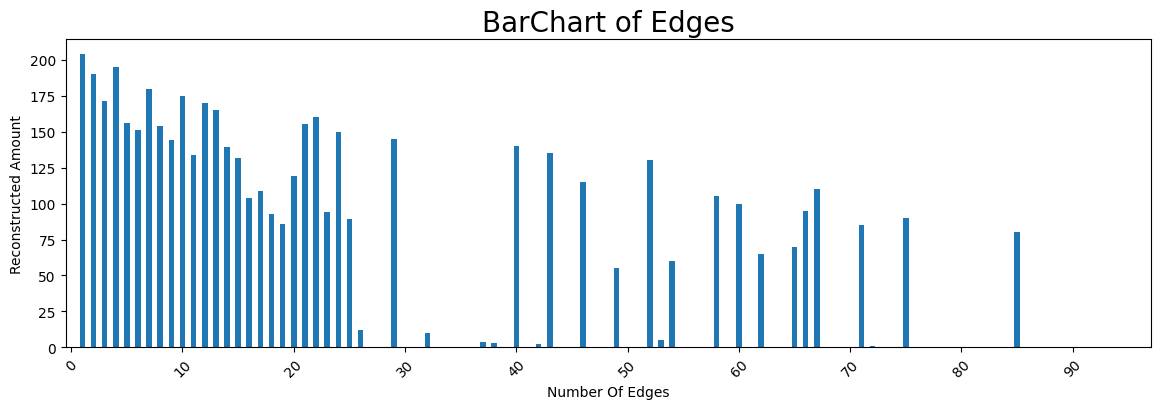

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Filter out the values of 0
filtered_counts = {key: value for key, value in reconstruction_counts.items() if value != 0}

# Count the occurrences of each value
value_counts = Counter(filtered_counts.values())

# Extract values and their counts
values = list(value_counts.keys())
counts = list(value_counts.values())

# Calculate the threshold for the top 10 percent
threshold = int(0.1 * len(counts))

# Sort the values in descending order
sorted_values = sorted(values, reverse=True)

# Get the top 10 percent values
top_10_percent_values = sorted_values[:threshold]

# Get the bottom 10 percent values
bottom_10_percent_values = sorted_values[-threshold:]

# Create the figure and axis
fig, ax = plt.subplots()

# Set the figure size
fig.set_size_inches(14, 4)

# Plot the histogram
bars = ax.bar(counts, values, width=0.5)

# # Set color red for the top 10 percent bars
# for i, bar in enumerate(bars):
#     if values[i] in top_10_percent_values:
#         bar.set_color('blue')
#     elif values[i] in bottom_10_percent_values:
#         bar.set_color('red')
#     else: bar.set_color('grey')

# Set labels and title
ax.set_ylabel('Reconstructed Amount')
ax.set_xlabel('Number Of Edges')
ax.set_title('BarChart of Edges', fontsize=20)

# Set custom tick locations on x-axis
ax.set_xticks(range(0, max(counts) + 15, 10))

# Set custom tick locations on x-axis
ax.set_yticks(range(0, max(values) + 4, 25))

# Rotate x-axis labels and set font size
plt.xticks(rotation=45, fontsize=10)

plt.xlim(left=-0.5, right=len(values) -90)

# Show the plot
plt.show()


Graph 2 (Original)

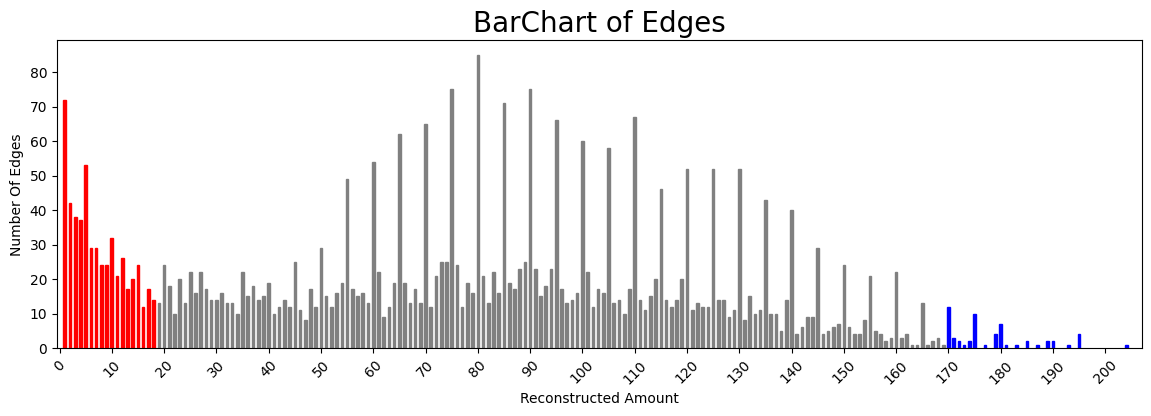

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Filter out the values of 0
filtered_counts = {key: value for key, value in reconstruction_counts.items() if value != 0}

# Count the occurrences of each value
value_counts = Counter(filtered_counts.values())

# Extract values and their counts
values = list(value_counts.keys())
counts = list(value_counts.values())

# Calculate the threshold for the top 10 percent
threshold = int(0.1 * len(counts))

# Sort the values in descending order
sorted_values = sorted(values, reverse=True)

# Get the top 10 percent values
top_10_percent_values = sorted_values[:threshold]

# Get the bottom 10 percent values
bottom_10_percent_values = sorted_values[-threshold:]

# Create the figure and axis
fig, ax = plt.subplots()

# Set the figure size
fig.set_size_inches(14, 4)

# Plot the histogram
bars = ax.bar(values, counts, width=0.5)

# Set color red for the top 10 percent bars
for i, bar in enumerate(bars):
    if values[i] in top_10_percent_values:
        bar.set_color('blue')
    elif values[i] in bottom_10_percent_values:
        bar.set_color('red')
    else: bar.set_color('grey')

# Set labels and title
ax.set_xlabel('Reconstructed Amount')
ax.set_ylabel('Number Of Edges')
ax.set_title('BarChart of Edges', fontsize=20)

# Set custom tick locations on x-axis
ax.set_xticks(range(0, max(values) + 1, 10))

# Rotate x-axis labels and set font size
plt.xticks(rotation=45, fontsize=10)

plt.xlim(left=-0.5, right=len(counts) + 20)

# Show the plot
plt.show()


#BarChart of top 10% values

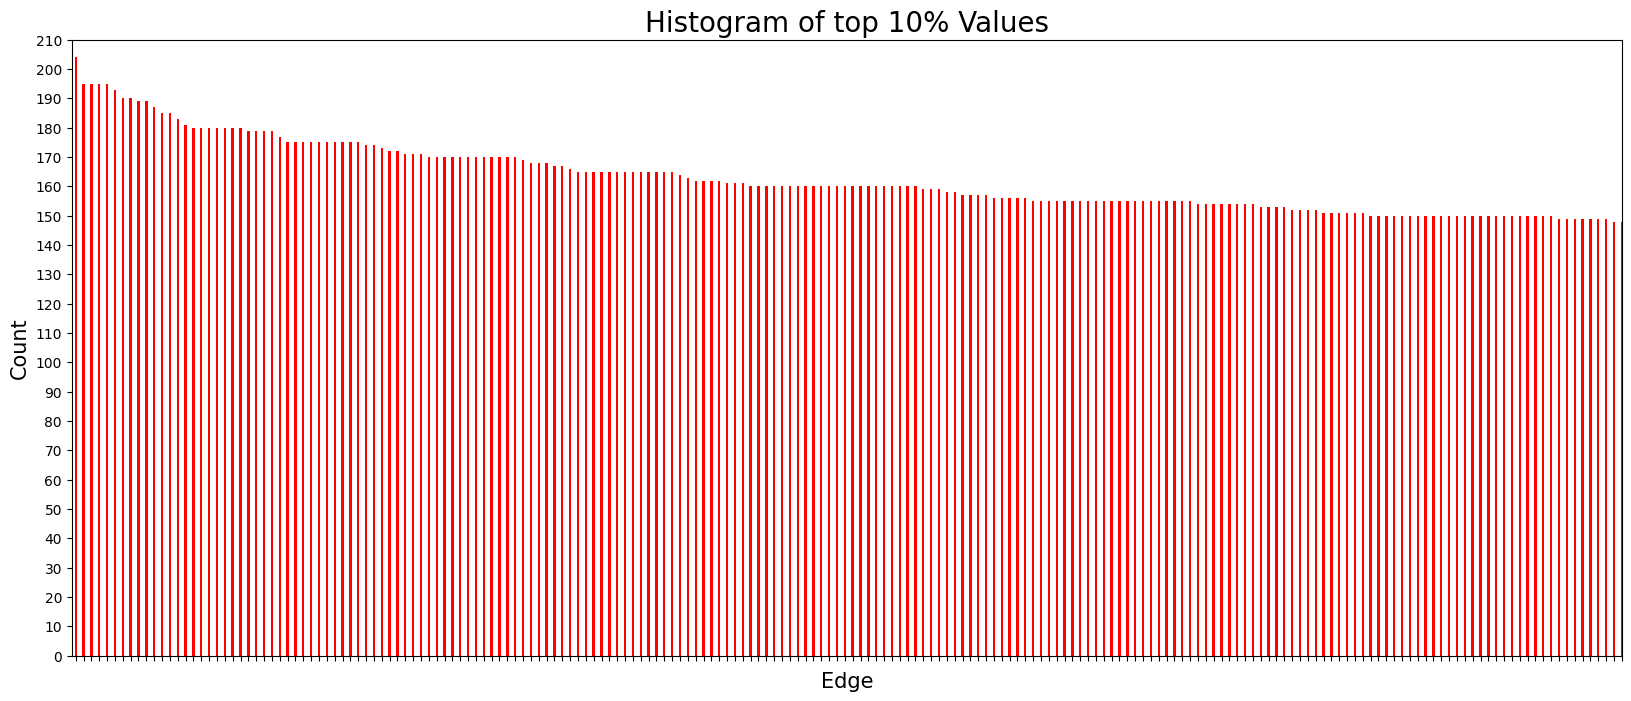

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

# Filter out the values of 0
filtered_data = {key: value for key, value in reconstruction_counts.items() if value != 0}

# Sort the dictionary by values in descending order
sorted_data = dict(sorted(filtered_data.items(), key=lambda item: item[1], reverse=True))

# Extract keys and values
keys = list(sorted_data.keys())
values = list(sorted_data.values())

# Create the figure and axis
fig, ax = plt.subplots()

# Set the figure size
fig.set_size_inches(20, 8)

# Plot the histogram
ax.bar(range(len(keys)), values, align='center', color='red',width=0.3)
# Set x-axis tick labels
ax.set_xticks(range(len(keys)))
ax.set_xticklabels([])

# Set the font size of the X-axis tick labels
ax.tick_params(axis='x', labelsize=1)
# Set y-axis range to show actual values
ax.set_ylim(bottom=min(values), top=max(values))

# Set labels and title
ax.set_xlabel('Edge',fontsize=15)
ax.set_ylabel('Count',fontsize=15)
ax.set_title('BarChart of top 10% Values',fontsize=20)

# Set custom tick locations on x-axis
ax.set_xticks(range(0, max(values) + 1,1))

# Set y-axis tick values
ax.set_yticks(range(0, max(values)+10, 10))

# Rotate x-axis labels and set font size
plt.xticks(rotation=90, fontsize=6)

plt.xlim(left=-0.5, right=len(counts) + 10)

# Show the plot
plt.show()


#Print the precentage of edges successfully reconstructed over 500 iterations

In [ ]:
#show the percentage of the reconstrudcted edges
# Create a new dictionary with updated values
updated_data = {key: (value / 500) * 100 for key, value in reconstruction_counts.items()}
for edge, count in updated_data.items():
    formatted_number = f"{count:.2f}"
    print(f"Edge: {edge}  Precentage: {formatted_number} %")



Streaming output truncated to the last 5000 lines.
Edge: (1153853, 578650)  Precentage: 1.00 %
Edge: (1153943, 82920)  Precentage: 5.80 %
Edge: (1153943, 85352)  Precentage: 5.20 %
Edge: (1153943, 97390)  Precentage: 0.00 %
Edge: (1153943, 576257)  Precentage: 0.40 %
Edge: (1154176, 33895)  Precentage: 17.20 %
Edge: (1154459, 14062)  Precentage: 16.40 %
Edge: (1154459, 82920)  Precentage: 6.20 %
Edge: (1154459, 85352)  Precentage: 19.00 %
Edge: (116552, 40)  Precentage: 2.20 %
Edge: (116552, 116553)  Precentage: 11.20 %
Edge: (116552, 246618)  Precentage: 16.60 %
Edge: (12576, 887)  Precentage: 0.00 %
Edge: (12576, 6213)  Precentage: 0.00 %
Edge: (12576, 1071981)  Precentage: 0.00 %
Edge: (12576, 1104999)  Precentage: 21.00 %
Edge: (12576, 1105221)  Precentage: 15.20 %
Edge: (12576, 1107674)  Precentage: 25.40 %
Edge: (12576, 127033)  Precentage: 28.40 %
Edge: (12576, 135130)  Precentage: 22.20 %
Edge: (12576, 229635)  Precentage: 5.20 %
Edge: (12576, 28290)  Precentage: 7.60 %
Edge: (